In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.metrics import mean_squared_error
from numpy import array
from numpy import savetxt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\arjun\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\arjun\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.

During handling of the above exception, another exception occurred:

Traceback (most recent call

TypeError: can only concatenate str (not "list") to str

In [13]:

import pandas as pd
df = pd.read_csv('C:\\Users\\arjun\\Downloads\\ethereum_price.csv')

In [14]:
df = df[['Closing Price (USD)']]

In [15]:
data = []
for i in df['Closing Price (USD)']:
  if(i<900):
    data.append(i)
hist = []
target = []
length = 8
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data[i+length]
    hist.append(x)
    target.append(y)


In [16]:
hist = np.array(hist)
target = np.array(target)
target = target.reshape(-1,1)

In [17]:
hist_scaled = hist.reshape((len(hist), length, 1))
print(hist_scaled.shape)


(1875, 8, 1)


In [18]:
X_train = hist_scaled[:1820,:,:]
X_test = hist_scaled[1820:,:,:]
y_train = target[:1820,:]
y_test = target[1820:,:]

In [19]:
newmodel = tf.keras.Sequential()
newmodel.add(layers.LSTM(units=64, return_sequences= True, input_shape=(X_train.shape[1],1)))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.LSTM(units=64, return_sequences=True))
newmodel.add(layers.Dropout(0.2))
newmodel.add(layers.LSTM(units=64))
newmodel.add(layers.Dropout(0.2))

newmodel.add(layers.Dense(units=1))
newmodel.summary()
newmodel.compile(optimizer='adam', loss='mean_squared_error')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-754998cbbbc2>", line 1, in <module>
    newmodel = tf.keras.Sequential()
AttributeError: module 'tensorflow' has no attribute 'keras'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\arjun

AttributeError: module 'tensorflow' has no attribute 'keras'

In [11]:
history = newmodel.fit(X_train, y_train, epochs=120, batch_size=16)

Epoch 1/120
114/114 [==============================] - 1s 7ms/step - loss: 68519.8750
Epoch 2/120
114/114 [==============================] - 1s 7ms/step - loss: 65284.7500
Epoch 3/120
114/114 [==============================] - 1s 7ms/step - loss: 62816.6953
Epoch 4/120
114/114 [==============================] - 1s 7ms/step - loss: 60530.8164
Epoch 5/120
114/114 [==============================] - 1s 7ms/step - loss: 58322.0977
Epoch 6/120
114/114 [==============================] - 1s 7ms/step - loss: 56193.8633
Epoch 7/120
114/114 [==============================] - 1s 7ms/step - loss: 54218.8672
Epoch 8/120
114/114 [==============================] - 1s 7ms/step - loss: 52322.2852
Epoch 9/120
114/114 [==============================] - 1s 7ms/step - loss: 50495.4375
Epoch 10/120
114/114 [==============================] - 1s 7ms/step - loss: 48769.7969
Epoch 11/120
114/114 [==============================] - 1s 7ms/step - loss: 47105.5703
Epoch 12/120
114/114 [==============================

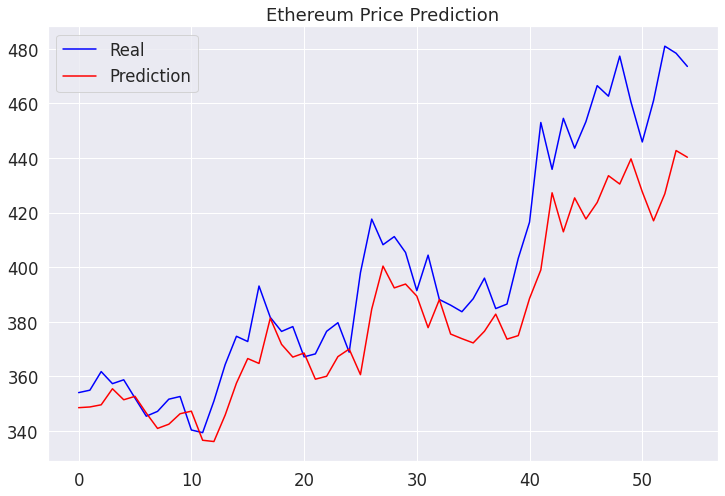

In [12]:
pred = newmodel.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Ethereum Price Prediction')
plt.legend()
plt.show()

In [18]:
def predictor(model,X_train,n):
    x_input = X_train[-1]
    n_steps=8
    n_features=1
    temp_input=list(x_input)
    lst_output=[]
    i=0
    while(i<n):
        if(len(temp_input)>8):
            #print("new this")
            x_input=np.array(temp_input[1:])
              #print("{} day input {}".format(i,x_input.shape))
            #print(x_input)
            x_input = x_input.reshape((1, n_steps, n_features))
              #print(x_input.shape)
            #print(x_input)
            x_input=np.asarray(x_input).astype(np.float64)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.append(yhat)
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.append(yhat)
            i=i+1
            
        else:
            #print("inside else")
            x_input = x_input.reshape((1, n_steps, n_features))
              #print(x_input.shape)
            yhat = model.predict(x_input, verbose=0)
            print("0 day output",yhat)
            temp_input.append(yhat)
            #print(len(temp_input))
            lst_output.append(yhat)
            i=i+1
    return lst_output



In [25]:
n = int(input("Which day's value you wanna know:"))

Which day's value you wanna know:5


In [24]:
t = predictor(newmodel,X_train,n)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-46f88115f5f6>", line 1, in <module>
    t = predictor(newmodel,X_train,n)
NameError: name 'predictor' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\arjun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\arjun\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\arjun\Anaconda3\lib\site-pa

NameError: name 'predictor' is not defined

In [30]:
t =np.array(t)
t = t.reshape(n,1)

In [1]:
plt.plot(t)
plt.plot(y_test[:n])

NameError: name 'plt' is not defined